<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_0.8_n250.csv',
 'data_add_delta_0.8_n120.csv',
 'data_add_delta_0.8_n60.csv',
 'data_add_delta_0.8_n30.csv',
 'data_add_delta_0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,1.278188,301.576743,298.964938,2.611804
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-9.612941,244.701315,253.492561,-8.791247
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-7.164203,314.882736,318.314421,-3.431686
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,3.218014,251.756086,246.117904,5.638182
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-2.590530,245.265889,245.710081,-0.444192
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-5.060529,182.721258,183.185210,-0.463952
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-4.465920,264.604714,266.372556,-1.767842
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-3.145790,230.143730,229.386889,0.756841
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-4.681098,155.888337,156.974892,-1.086555


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  1.278188  301.576743   
      1.0    62.341958  92.738979  37.239107  51.994211 -9.612941  244.701315   
      2.0    82.767350  34.887227  94.604833  99.787529 -7.164203  314.882736   
      3.0    49.539820  49.999782  53.122462  85.876007  3.218014  251.756086   
      4.0    98.457591  44.031028  65.231268  30.136533 -2.590530  245.265889   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -5.060529  182.721258   
      16.0   30.657670  99.609873  54.056862  74.746229 -4.465920  264.604714   
      17.0   57.560842  69.461073  38.185239  58.082366 -3.145790  230.143730   
      18.0   21.256972  23.348378  23.803154  82.160932 -4.681098  155.888337   
      19.0   42.077897  86.238056  76.790919  20.572005  0.460902  236.139779   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    298.964938  2.611804  
      1.0    253.492561 -8.791247  
      2.0    318.314421 -3.431686  
      3.0    246.117904  5.638182  
      4.0    245.710081 -0.444192  
...                 ...       ...  
999.0 15.0   183.185210 -0.463952  
      16.0   266.372556 -1.767842  
      17.0   229.386889  0.756841  
      18.0   156.974892 -1.086555  
      19.0   231.207658  4.932121  

[20000 rows x 8 columns]

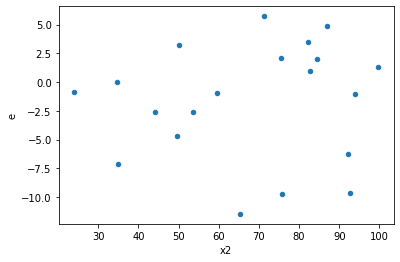

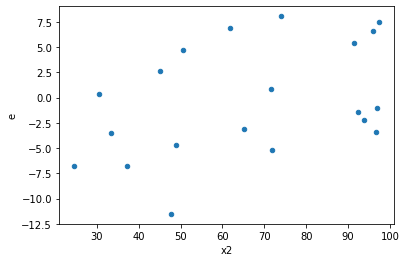

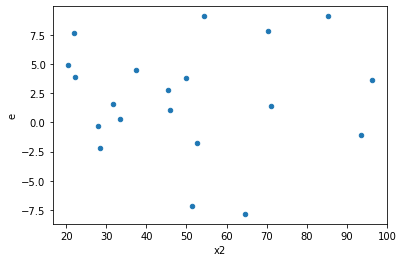

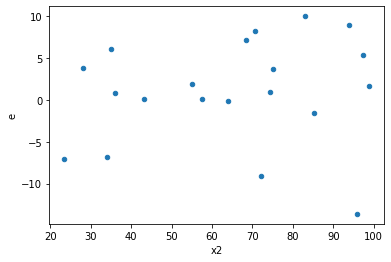

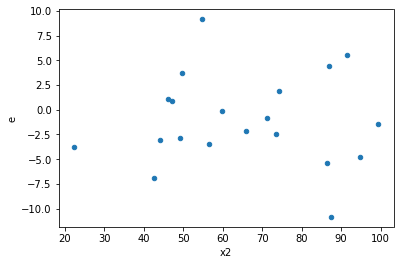

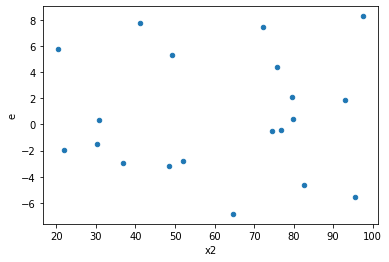

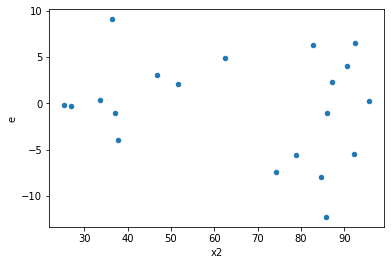

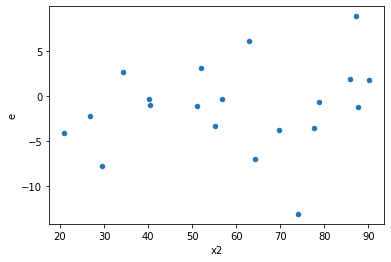

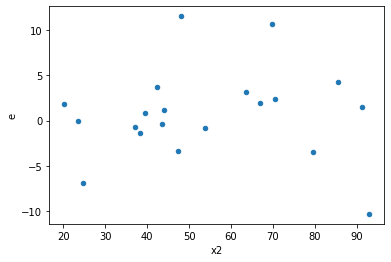

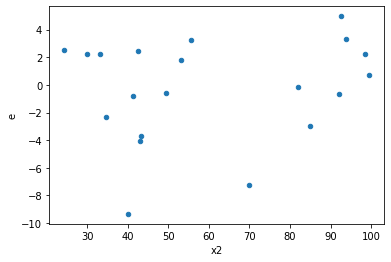

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,41.5954810754387,105.66564936932568,10.398870268859675,26.41641234233142,2.5403155976892675,0.38856083608365366,0.8057195819581732,0.19428041804182683,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,27.01947930488201,159.95751555749936,6.754869826220503,39.98937888937484,5.920081351404779,0.11322305778311748,0.9433884711084413,0.05661152889155874,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,28.665236966220174,237.6682032555229,7.166309241555044,59.41705081388073,8.291164783866849,0.06451706381222455,0.9677414680938877,0.032258531906112276,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,10.97474452856834,34.69894484272942,2.743686132142085,8.674736210682354,3.161708662320535,0.2909300794542464,0.8545349602728768,0.1454650397271232,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,10.845845520416194,40.53833056087413,2.7114613801040486,10.134582640218532,3.737682828375609,0.22969742594389064,0.8851512870280547,0.11484871297194532,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,67.2351484753938,241.78389146135322,16.80878711884845,60.445972865338305,3.596093664459437,0.2428364431711465,0.8785817784144268,0.12141822158557325,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,7.437941890652806,83.09927743840629,1.8594854726632015,20.774819359601572,11.17234830011732,0.038277229034296756,0.9808613854828516,0.019138614517148378,Reject001=1 : Homoscedasticity
9.0,4.0,4.0,17.645466664795602,31.341310790942476,4.411366666198901,7.835327697735619,1.776167861486565,0.5915532698237622,0.7042233650881189,0.2957766349118811,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,78.7875005038579,143.43113084229336,19.696875125964475,35.85778271057334,1.82048078597531,0.575956963604036,0.712021518197982,0.287978481802018,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,152.78222923845496,87.91431887827632,38.19555730961374,21.97857971956908,0.5754224121253264,0.6055358244086096,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,41.5954810754387,105.66564936932568,10.398870268859675,26.41641234233142,2.5403155976892675,0.38856083608365366,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,27.01947930488201,159.95751555749936,6.754869826220503,39.98937888937484,5.920081351404779,0.11322305778311748,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,28.665236966220174,237.6682032555229,7.166309241555044,59.41705081388073,8.291164783866849,0.06451706381222455,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,10.97474452856834,34.69894484272942,2.743686132142085,8.674736210682354,3.161708662320535,0.2909300794542464,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,10.845845520416194,40.53833056087413,2.7114613801040486,10.134582640218532,3.737682828375609,0.22969742594389064,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,67.2351484753938,241.78389146135322,16.80878711884845,60.445972865338305,3.596093664459437,0.2428364431711465,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,40.24453531169323,38.545542232845136,10.061133827923307,9.636385558211284,0.9577832601199289,0.9676597016601063,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,7.437941890652806,83.09927743840629,1.8594854726632015,20.774819359601572,11.17234830011732,0.038277229034296756,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      970
Reject001=0 : Heteroscedasticity     30
Name: Result_test, dtype: int64